참고 사이트

https://github.com/DonghyunAnn/Gbig-Hackathon/blob/master/notebook/안동현/MCLP_Roaddata.ipynb

https://wkddmswh99.tistory.com/16

# 1. Package Import

In [40]:
# pip install yellowbrick
!pip install scikit-learn-extra

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

## Data Import

In [3]:
df_cost = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/구별 의료 및 인구 데이터.csv')
df_station = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울교통공사_역주소 및 전화번호_20230331.csv', encoding='cp949')
df_shop = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 관광 쇼핑.csv', encoding='cp949')
df_hospital = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 병의원 위치 정보.csv', encoding='cp949')
df_el_me = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(노인의료복지시설) 목록.csv', encoding='cp949')
df_el_house = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(노인주거복지시설) 목록.csv', encoding='cp949')
df_dis_hospital = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(장애인의료재활시설) 목록.csv', encoding='cp949')
df_dis_house = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(장애인거주시설) 목록.csv', encoding='cp949')
df_med = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 약국 운영시간 정보.csv', encoding='cp949')
df_subway_people = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 지하철호선별 역별 승하차 인원 정보(2022).csv')
df_dis_number = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 장애인 현황 (장애유형별:동별) 통계 2022.csv')
df_el_number = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 고령자현황 (구별) 통계.csv')
df_bus_number = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/구별 버스정류장 개수.csv')


# 2. preprocessing

In [4]:
# 구별 지하철 역 개수 count

df_station['지하철 구'] = df_station['도로명주소'].str.split().str[1]
df_station_count = df_station.groupby(by='지하철 구').count().iloc[:,1].to_frame()
df_station_count = df_station_count.reset_index()
df_station_count.columns = ['시군구', '지하철역 개수']
df_station_count.head()
#df_station.head()

,시군구,지하철역 개수
0,강남구,21
1,강동구,14
2,강북구,3
3,강서구,9
4,고양시,1


In [5]:
# 구별 쇼핑 구역 개수 count

df_shop_juso = df_shop[df_shop['언어'] == 'ko'][['상호명', '신주소']]
df_shop_juso['신주소'] = df_shop_juso['신주소'].str.replace('\d+', '', regex=True)
df_shop_juso['구'] = df_shop_juso['신주소'].str.split().str[1]
df_shop_count = df_shop_juso.groupby(by='구').count().iloc[:,1].to_frame()
df_shop_count = df_shop_count.reset_index()
df_shop_count.columns = ['시군구', '쇼핑 구역 개수']
df_shop_count.head()

,시군구,쇼핑 구역 개수
0,강남구,28
1,광진구,3
2,금천구,2
3,도봉구,2
4,동대문구,4


In [6]:
# 구별 병의원 개수

df_hospital_juso = df_hospital[['기관ID', '주소']]
df_hospital_juso['구'] = df_hospital_juso['주소'].str.split().str[1].to_frame()
df_hospital_juso_count = df_hospital_juso.groupby(by='구').count().iloc[:,1].to_frame()
df_hospital_juso_count = df_hospital_juso_count.reset_index()
df_hospital_juso_count.columns = ['시군구', '병의원 개수']
df_hospital_juso_count.head()

/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_6578/1115379810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospital_juso['구'] = df_hospital_juso['주소'].str.split().str[1].to_frame()


,시군구,병의원 개수
0,강남구,3069
1,강동구,912
2,강북구,488
3,강서구,966
4,관악구,744


In [7]:
# 구별 노인의료복지시설 개수 count
df_el_me_juso = df_el_me[['시설명', '시군구명']]
df_el_me_juso_count = df_el_me_juso.groupby(by='시군구명').count().reset_index()
df_el_me_juso_count.columns = ['시군구', '노인의료복지시설 개수']
df_el_me_juso_count.head()

,시군구,노인의료복지시설 개수
0,강남구,10
1,강동구,24
2,강북구,32
3,강서구,39
4,관악구,36


In [8]:
# 구별 노인주거복지시설 개수 count

df_el_house_juso = df_el_house[['시설명', '시군구명']]
df_el_house_juso_count = df_el_house_juso.groupby(by='시군구명').count().reset_index()
df_el_house_juso_count.columns = ['시군구', '노인주거복지시설 개수']
df_el_house_juso_count.head()

,시군구,노인주거복지시설 개수
0,강남구,2
1,강동구,1
2,강서구,3
3,광진구,2
4,금천구,2


In [9]:
# 구별 장애인의료재활시설

df_dis_hospital_juso = df_dis_hospital[['시설명', '시군구명']]
df_dis_hospital_juso_count = df_dis_hospital_juso.groupby(by='시군구명').count().reset_index()
df_dis_hospital_juso_count.columns = ['시군구', '장애인의료재활시설 개수']
df_dis_hospital_juso_count.head()

,시군구,장애인의료재활시설 개수
0,강동구,1
1,관악구,2
2,마포구,1
3,성동구,1
4,은평구,1


In [10]:
# 구별 장애인거주시설

df_dis_house_juso = df_dis_house[['시설명', '시군구명']]
df_dis_house_juso_count = df_dis_house_juso.groupby(by='시군구명').count().reset_index()
df_dis_house_juso_count.columns = ['시군구', '장애인거주시설 개수']
df_dis_house_juso_count.head()

,시군구,장애인거주시설 개수
0,강남구,24
1,강동구,20
2,강북구,18
3,강서구,29
4,관악구,8


In [11]:
# 구별 약국 개수

df_med_juso = df_med[['약국ID', '주소']]
df_med_juso['구'] = df_med_juso['주소'].str.split().str[1].to_frame()
df_med_juso_count = df_med_juso.groupby(by='구').count().iloc[:,1].to_frame()
df_med_juso_count = df_med_juso_count.reset_index()
df_med_juso_count.columns = ['시군구', '약국 개수']
df_med_juso_count.head()

/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_6578/4276189698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_med_juso['구'] = df_med_juso['주소'].str.split().str[1].to_frame()


,시군구,약국 개수
0,강남구,525
1,강동구,260
2,강북구,176
3,강서구,289
4,관악구,234


In [12]:
# 2022년 역별 승하차 인원 정보

df_station_juso = df_station[['역명', '지하철 구']]

df_subway_people.head(10)
df_subway_people['역 이용 총 승객 수'] = df_subway_people['승차총승객수'] + df_subway_people['하차총승객수']
df_subway_people = df_subway_people[['역명', '역 이용 총 승객 수']]

merged_subway_df = pd.merge(df_station_juso, df_subway_people, on='역명')

merged_subway_df_count = merged_subway_df.groupby(by='지하철 구')['역 이용 총 승객 수'].sum().reset_index()
merged_subway_df_count.columns = ['시군구', '구별 지하철 총 승객 수']
merged_subway_df_count.head()

,시군구,구별 지하철 총 승객 수
0,강남구,350427151
1,강동구,123564526
2,강북구,32071161
3,강서구,96283191
4,고양시,3319770


In [13]:
df_cost.columns = ['시군구', '총 의료비용', '총 거주인구']
df_cost = df_cost[['시군구', '총 의료비용']]
df_cost.head()

,시군구,총 의료비용
0,강남구,1600231796936
1,강동구,304912421021
2,강북구,134752996931
3,강서구,367726959119
4,관악구,192331403810


In [14]:
df_dis_number = df_dis_number.iloc[3:].reset_index(drop=True)
df_dis_number = df_dis_number.iloc[:,1:]
df_dis_number.columns = ['시군구', '장애 인구']
df_dis_number.head()

,시군구,장애 인구
0,종로구,5834
1,중구,5552
2,용산구,7621
3,성동구,11092
4,광진구,12183


In [15]:
df_el_number = df_el_number.iloc[:,1:]
df_el_number.columns = ['시군구', '전체인구', '65세 이상 인구']
df_el_number = df_el_number.iloc[2:].reset_index(drop = 'TRUE')
df_el_number.tail()

,시군구,전체인구,65세 이상 인구
20,관악구,501226,82447
21,서초구,408451,62347
22,강남구,534103,81715
23,송파구,664514,103573
24,강동구,464037,78340


In [18]:
df_bus_number = df_bus_number[['SIG_KOR_NM', 'NUMPOINTS']]
df_bus_number.columns = ['시군구', '버스정류장 개수']
df_bus_number.head()

,시군구,버스정류장 개수
0,종로구,474
1,중구,247
2,용산구,380
3,성동구,512
4,광진구,322


In [32]:
# 모든 데이터 프레임 결합

merged_df = pd.merge(df_station_count, df_shop_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_hospital_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_el_me_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_el_house_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_dis_hospital_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_dis_house_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_med_juso_count, on='시군구', how='left')
# merged_df = pd.merge(merged_df, merged_subway_df_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_cost, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_dis_number, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_el_number, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_bus_number, on='시군구', how='left')

merged_df = merged_df[~merged_df['시군구'].str.endswith('시')].reset_index(drop=True)

merged_df.head()

,시군구,지하철역 개수,쇼핑 구역 개수,병의원 개수,노인의료복지시설 개수,노인주거복지시설 개수,장애인의료재활시설 개수,장애인거주시설 개수,약국 개수,총 의료비용,장애 인구,전체인구,65세 이상 인구,버스정류장 개수
0,강남구,21,28.0,3069.0,10.0,2.0,NaN,24.0,525.0,1.600232e+12,15158,534103,81715,619.0
1,강동구,14,NaN,912.0,24.0,1.0,1.0,20.0,260.0,3.049124e+11,18785,464037,78340,440.0
2,강북구,3,NaN,488.0,32.0,NaN,NaN,18.0,176.0,1.347530e+11,17186,297702,66307,487.0
3,강서구,9,NaN,966.0,39.0,3.0,NaN,29.0,289.0,3.677270e+11,28508,574638,97128,698.0
4,관악구,4,NaN,744.0,36.0,NaN,2.0,8.0,234.0,1.923314e+11,20228,501226,82447,508.0


In [33]:
final_df = merged_df.fillna(0)
final_df.iloc[:, 1:-3] = final_df.iloc[:, 1:-3].astype(int)
final_df.iloc[:, -1] = final_df.iloc[:, -1].astype(int)
final_df.head()

/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_6578/411244477.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df.iloc[:, 1:-3] = final_df.iloc[:, 1:-3].astype(int)
/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_6578/411244477.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df.iloc[:, -1] = final_df.iloc[:, -1].astype(int)


,시군구,지하철역 개수,쇼핑 구역 개수,병의원 개수,노인의료복지시설 개수,노인주거복지시설 개수,장애인의료재활시설 개수,장애인거주시설 개수,약국 개수,총 의료비용,장애 인구,전체인구,65세 이상 인구,버스정류장 개수
0,강남구,21,28,3069,10,2,0,24,525,1600231796936,15158,534103,81715,619
1,강동구,14,0,912,24,1,1,20,260,304912421021,18785,464037,78340,440
2,강북구,3,0,488,32,0,0,18,176,134752996931,17186,297702,66307,487
3,강서구,9,0,966,39,3,0,29,289,367726959119,28508,574638,97128,698
4,관악구,4,0,744,36,0,2,8,234,192331403810,20228,501226,82447,508


In [34]:
final_df.columns

Index(['시군구', '지하철역 개수', '쇼핑 구역 개수', '병의원 개수', '노인의료복지시설 개수', '노인주거복지시설 개수',
       '장애인의료재활시설 개수', '장애인거주시설 개수', '약국 개수', '총 의료비용', '장애 인구', '전체인구',
       '65세 이상 인구', '버스정류장 개수'],
      dtype='object')

In [35]:
final_df.shape

(25, 14)

In [37]:
final_df['병원, 약국 개수'] = final_df['병의원 개수'] + final_df['약국 개수']
final_df['노인 시설 개수'] = final_df['노인의료복지시설 개수'] + final_df['노인주거복지시설 개수']
final_df['장애인 시설 개수'] = final_df['장애인의료재활시설 개수'] + final_df['장애인거주시설 개수']

final_df = final_df[['시군구', '지하철역 개수', '쇼핑 구역 개수', '총 의료비용',
       '장애 인구', '전체인구', '65세 이상 인구', '병원, 약국 개수', '장애인 시설 개수', '노인 시설 개수', '버스정류장 개수']]
final_df.head()

,시군구,지하철역 개수,쇼핑 구역 개수,총 의료비용,장애 인구,전체인구,65세 이상 인구,"병원, 약국 개수",장애인 시설 개수,노인 시설 개수,버스정류장 개수
0,강남구,21,28,1600231796936,15158,534103,81715,3594,24,12,619
1,강동구,14,0,304912421021,18785,464037,78340,1172,21,25,440
2,강북구,3,0,134752996931,17186,297702,66307,664,18,32,487
3,강서구,9,0,367726959119,28508,574638,97128,1255,29,42,698
4,관악구,4,0,192331403810,20228,501226,82447,978,10,36,508


In [38]:
final_df

,시군구,지하철역 개수,쇼핑 구역 개수,총 의료비용,장애 인구,전체인구,65세 이상 인구,"병원, 약국 개수",장애인 시설 개수,노인 시설 개수,버스정류장 개수
0,강남구,21,28,1600231796936,15158,534103,81715,3594,24,12,619
1,강동구,14,0,304912421021,18785,464037,78340,1172,21,25,440
2,강북구,3,0,134752996931,17186,297702,66307,664,18,32,487
3,강서구,9,0,367726959119,28508,574638,97128,1255,29,42,698
4,관악구,4,0,192331403810,20228,501226,82447,978,10,36,508
5,광진구,11,3,245522858974,12183,351252,54071,772,1,22,322
6,구로구,7,0,235566747285,18520,418418,75890,795,9,17,618
7,금천구,1,2,263003873689,11615,242818,42928,518,8,27,393
8,노원구,13,0,282478291357,26696,508014,92040,1029,21,32,586
9,도봉구,3,2,108481699876,15345,313989,66998,516,12,56,429


# 2. PCA

## (1) Scaling

In [39]:
# '시군구' 열을 제외한 수치형 데이터 선택
numeric_cols = final_df.iloc[:,1:]

# 데이터 표준화
scaler = StandardScaler()
scaler.fit(numeric_cols)
df_scaled = scaler.transform(numeric_cols)
df_scaled

array([[ 1.5860039 ,  2.63986579,  4.35062715, -0.0923162 ,  1.19923713,
         0.76205618,  4.2038289 ,  1.75381015, -0.79083732,  0.99237044],
       [ 0.4846123 , -0.68969467, -0.06917854,  0.5561284 ,  0.62917002,
         0.59080544,  0.26385769,  1.36233467,  0.19016317, -0.52276355],
       [-1.24614592, -0.68969467, -0.64978562,  0.27025498, -0.7241556 ,
        -0.01976056, -0.56252768,  0.97085919,  0.71839421, -0.12493507],
       [-0.30209598, -0.68969467,  0.14515319,  2.29443193,  1.52903576,
         1.54412663,  0.39887735,  2.40626928,  1.47300997,  1.66106087],
       [-1.08880427, -0.68969467, -0.45332027,  0.81411174,  0.93174511,
         0.79919857, -0.05173042, -0.07307542,  1.02024051,  0.05281808],
       [ 0.01258733, -0.33295605, -0.2718238 , -0.62419453, -0.28846506,
        -0.64062697, -0.38683945, -1.24750186, -0.03622156, -1.52156697],
       [-0.6167793 , -0.68969467, -0.30579541,  0.50875101,  0.25800724,
         0.46649008, -0.34942437, -0.20356725

In [40]:
# '시군구' 열을 추출
sigungu_col = merged_df['시군구']

# 표준화된 데이터를 데이터프레임으로 변환
df_scaled = pd.DataFrame(data=df_scaled, columns=numeric_cols.columns)

# '시군구' 열과 표준화된 데이터프레임을 병합
merged_df_scaled = pd.concat([sigungu_col, df_scaled], axis=1)

In [41]:
merged_df_scaled.head()

,시군구,지하철역 개수,쇼핑 구역 개수,총 의료비용,장애 인구,전체인구,65세 이상 인구,"병원, 약국 개수",장애인 시설 개수,노인 시설 개수,버스정류장 개수
0,강남구,1.586004,2.639866,4.350627,-0.092316,1.199237,0.762056,4.203829,1.753810,-0.790837,0.992370
1,강동구,0.484612,-0.689695,-0.069179,0.556128,0.629170,0.590805,0.263858,1.362335,0.190163,-0.522764
2,강북구,-1.246146,-0.689695,-0.649786,0.270255,-0.724156,-0.019761,-0.562528,0.970859,0.718394,-0.124935
3,강서구,-0.302096,-0.689695,0.145153,2.294432,1.529036,1.544127,0.398877,2.406269,1.473010,1.661061
4,관악구,-1.088804,-0.689695,-0.453320,0.814112,0.931745,0.799199,-0.051730,-0.073075,1.020241,0.052818


## (2) PCA

In [42]:
train_features = merged_df_scaled.iloc[:,1:]

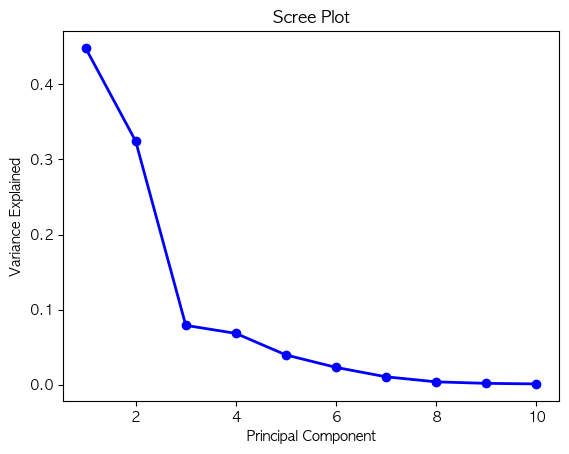

In [43]:
#define PCA model to use
pca = PCA(n_components=10)

#fit PCA model to data
pca_fit = pca.fit(train_features)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [44]:
print(pca.explained_variance_ratio_)

[0.44848279 0.32429474 0.07902613 0.06835246 0.03962536 0.02306743
 0.01049992 0.00379453 0.00180955 0.00104708]


In [45]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(merged_df_scaled.iloc[:,1:])
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

print('누적 설명 분산량: ', sum(pca.explained_variance_ratio_).round(4))

누적 설명 분산량:  0.7728


In [30]:
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, train_features):

    # Change pcs components ndarray to a dataframe
    importance_df = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = train_features.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df

# Call function to create importance df
importance_df = create_importance_dataframe(pca, train_features)

# Show first few rows
display(importance_df)

# Sort depending on PC of interest

## PC1 top 5 important features
pc1_top_5_features = importance_df['PC1'].sort_values(ascending = False)[:5]
print(), print(f'PC1 top 5 feautres are')
display(pc1_top_5_features )

## PC2 top 10 important features
pc2_top_5_features = importance_df['PC2'].sort_values(ascending = False)[:5]
print(), print(f'PC2 top 5 feautres are')
display(pc2_top_5_features )

# ## PC3 top 10 important features
# pc3_top_10_features = importance_df['PC3'].sort_values(ascending = False)[:10]
# print(), print(f'PC3 top 10 feautres are')
# display(pc3_top_10_features )

# ## PC4 top 10 important features
# pc4_top_10_features = importance_df['PC4'].sort_values(ascending = False)[:10]
# print(), print(f'PC4 top 10 feautres are')
# display(pc4_top_10_features )

,PC1,PC2
지하철역 개수,0.091156,0.405625
쇼핑 구역 개수,0.134879,0.438201
구별 지하철 총 승객 수,0.057245,0.452209
총 의료비용,0.221223,0.362459
장애 인구,0.391895,0.229208
전체인구,0.444953,0.024454
65세 이상 인구,0.442238,0.121518
"병원, 약국 개수",0.299811,0.339279
장애인 시설 개수,0.395539,0.038161
노인 시설 개수,0.174065,0.347894



PC1 top 5 feautres are


전체인구         0.444953
65세 이상 인구    0.442238
장애인 시설 개수    0.395539
장애 인구        0.391895
버스정류장 개수     0.312259
Name: PC1, dtype: float64


PC2 top 5 feautres are


구별 지하철 총 승객 수    0.452209
쇼핑 구역 개수         0.438201
지하철역 개수          0.405625
총 의료비용           0.362459
노인 시설 개수         0.347894
Name: PC2, dtype: float64

In [31]:
fin_df = pd.concat([pd.Series(merged_df_scaled.iloc[:,0], name='시군구'), principalDf], axis=1)
fin_df

,시군구,principal component1,principal component2
0,강남구,-3.837797,6.086134
1,강동구,-1.356760,-0.389746
2,강북구,0.155856,-2.030805
3,강서구,-4.177676,-1.559797
4,관악구,-1.106018,-1.778754
5,광진구,1.739282,-0.073869
6,구로구,-0.526429,-0.884485
7,금천구,2.131670,-1.521976
8,노원구,-2.774631,-0.945857
9,도봉구,0.473173,-2.583793


# 3. Clustering

## (1) K-means Clustering

In [70]:
train_df = fin_df.iloc[:,1:]

In [71]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(train_df)

# Set the title of the visualizer
visualizer.ax.set_title("Elbow Method for Optimal k")

visualizer.show()

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(train_df)
kmeans.labels_

In [ ]:
k_means_labels = kmeans.labels_
df_kmeans = pd.concat([fin_df, pd.Series(k_means_labels, name='k_means_label')], axis=1)
df_kmeans

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))

# 산점도 그리기
plt.scatter(df_kmeans['principal component1'], df_kmeans['principal component2'], c=df_kmeans['k_means_label'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Result')

# 시군구 이름 표시
for i, txt in enumerate(df_kmeans['시군구']):
    plt.annotate(txt, (df_kmeans['principal component1'][i], df_kmeans['principal component2'][i]), fontsize=8)

plt.show()

## (2) 계층적 군집분석

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
# 연결 : single, 거리: Euclidean
Z_short = linkage(train_df, method = "single", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_short, labels = fin_df["시군구"].values , leaf_font_size = 10)
plt.title("최단연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [ ]:
# 연결 : average, 거리: Euclidean
Z_average = linkage(train_df, method = "average", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_average, labels = fin_df["시군구"].values, leaf_font_size = 10)
plt.title("평균연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [ ]:
# 연결 : centroid, 거리: Euclidean
Z_centroid = linkage(train_df, method = "centroid", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_centroid, labels = fin_df["시군구"].values, leaf_font_size = 10)
plt.title("중심연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [ ]:
# 연결 : complete, 거리: Euclidean
Z_long = linkage(train_df, method = "complete", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_long, labels = fin_df["시군구"].values, leaf_font_size = 10)
plt.title("최장연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [ ]:
# 연결 : ward, 거리: Euclidean
Z_ward = linkage(train_df, method = "ward", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_ward, labels = fin_df["시군구"].values, leaf_font_size = 10)
plt.title("와드연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

## (3) GMM

In [ ]:
gm = GaussianMixture(n_components=3, random_state=0).fit(train_df)
labels = gm.predict(train_df)

fig = plt.figure(figsize=(6,6))
plt.scatter(train_df.iloc[:,0], train_df.iloc[:,1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clustering Result')

# 시군구 이름 표시
for i, txt in enumerate(df_kmeans['시군구']):
    plt.annotate(txt, (df_kmeans['principal component1'][i], df_kmeans['principal component2'][i]), fontsize=8)

plt.show()